In [31]:
# Necessary imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as plb 
%matplotlib inline

import statsmodels.api as sm
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

sns.set(context='notebook', style='whitegrid', font_scale=1.2)

## Data Import & Setup

In [32]:
rentals = pd.read_csv('TODAYformated_OutlierFixed.csv')


In [34]:
rentals = pd.get_dummies(rentals, drop_first=True)
rentals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1724 entries, 0 to 1744
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price                       1724 non-null   int64  
 1   BedRooms                    1724 non-null   float64
 2   SQFT                        1724 non-null   float64
 3   BathRooms                   1724 non-null   float64
 4   No_Smoke                    1724 non-null   float64
 5   No_Park                     1724 non-null   float64
 6   W_D_Lndry                   1724 non-null   float64
 7   Pets                        1724 non-null   float64
 8   Property_Type               1724 non-null   float64
 9   Location_Carmichael         1724 non-null   uint8  
 10  Location_Citrus Heights     1724 non-null   uint8  
 11  Location_Davis              1724 non-null   uint8  
 12  Location_El Dorado Hills    1724 non-null   uint8  
 13  Location_Elk Grove          1724 

In [17]:
X, y = rentals.drop(['Price', 'No_Smoke', 'No_Park'],axis=1), rentals['Price']


X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=9)


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=9)

## Polynomial 2nd Degree

In [18]:
poly = PolynomialFeatures(degree=2, interaction_only=False)
    
X_poly_train = poly.fit_transform(X_train)
X_poly_val = poly.transform(X_val)
X_poly_test = poly.transform(X_test)

In [47]:
## Standard Scaller

In [19]:
scaler = StandardScaler(with_mean=False)

X_scale_train = scaler.fit_transform(X_poly_train)
X_scale_val = scaler.transform(X_poly_val)
X_scale_test = scaler.transform(X_poly_test)

# Regularization

## Lasso

In [20]:
alphavec = 10**np.linspace(-2,1,5000)

lasso_model = LassoCV(alphas=alphavec, cv=3).fit(X_train_scaled, y_train)

/Users/stay_one/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19349.086738578975, tolerance: 18748.540925170073
  model = cd_fast.enet_coordinate_descent_gram(
/Users/stay_one/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20372.54602971673, tolerance: 18748.540925170073
  model = cd_fast.enet_coordinate_descent_gram(
/Users/stay_one/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21571.51679083705, tolerance: 18748.540925170073
  model = cd_fast.enet_coordinate_descent_gram(
/Users/stay_

/Users/stay_one/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37384.473881304264, tolerance: 18748.540925170073
  model = cd_fast.enet_coordinate_descent_gram(
/Users/stay_one/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37865.42702665925, tolerance: 18748.540925170073
  model = cd_fast.enet_coordinate_descent_gram(
/Users/stay_one/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38327.26005835831, tolerance: 18748.540925170073
  model = cd_fast.enet_coordinate_descent_gram(
/Users/stay_

/Users/stay_one/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45947.79869478941, tolerance: 18748.540925170073
  model = cd_fast.enet_coordinate_descent_gram(
/Users/stay_one/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46064.8816922009, tolerance: 18748.540925170073
  model = cd_fast.enet_coordinate_descent_gram(
/Users/stay_one/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46176.5774557963, tolerance: 18748.540925170073
  model = cd_fast.enet_coordinate_descent_gram(
/Users/stay_one

/Users/stay_one/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47863.60938414931, tolerance: 18748.540925170073
  model = cd_fast.enet_coordinate_descent_gram(
/Users/stay_one/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47887.87175299227, tolerance: 18748.540925170073
  model = cd_fast.enet_coordinate_descent_gram(
/Users/stay_one/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47910.78812651336, tolerance: 18748.540925170073
  model = cd_fast.enet_coordinate_descent_gram(
/Users/stay_o

/Users/stay_one/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48192.823093891144, tolerance: 18748.540925170073
  model = cd_fast.enet_coordinate_descent_gram(
/Users/stay_one/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48194.3003282249, tolerance: 18748.540925170073
  model = cd_fast.enet_coordinate_descent_gram(
/Users/stay_one/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48195.45498135686, tolerance: 18748.540925170073
  model = cd_fast.enet_coordinate_descent_gram(
/Users/stay_o

/Users/stay_one/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48142.05885909498, tolerance: 18748.540925170073
  model = cd_fast.enet_coordinate_descent_gram(
/Users/stay_one/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48138.23903417587, tolerance: 18748.540925170073
  model = cd_fast.enet_coordinate_descent_gram(
/Users/stay_one/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48134.3425501287, tolerance: 18748.540925170073
  model = cd_fast.enet_coordinate_descent_gram(
/Users/stay_on

In [21]:
las_alpha = lasso_model.alpha_
las_alpha

1.7629875681607843

In [22]:
las = Lasso(alpha=las_alpha)

las.fit(X_scale_train, y_train)
print(f'Lasso Regression train R^2: {las.score(X_scale_train, y_train):.5f}')
print(f'Lasso Regression val R^2: {las.score(X_scale_val, y_val):.5f}')
print("")
print(f'Lasso Regression RMSE (train): {mean_squared_error(y_train, las.predict(X_scale_train), squared=False):.5f}')
print(f'Lasso Regression RMSE (val): {mean_squared_error(y_val, las.predict(X_scale_val), squared=False):.5f}')

Lasso Regression train R^2: 0.73455
Lasso Regression val R^2: 0.74875

Lasso Regression RMSE (train): 263.44027
Lasso Regression RMSE (val): 242.43988


## Ridge

In [23]:
alphavec = 10**np.linspace(-2,2,500)

ridge_model = RidgeCV(alphas=alphavec, cv=3)
ridge_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([1.00000000e-02, 1.01862899e-02, 1.03760502e-02, 1.05693455e-02,
       1.07662418e-02, 1.09668060e-02, 1.11711065e-02, 1.13792129e-02,
       1.15911962e-02, 1.18071285e-02, 1.20270833e-02, 1.22511358e-02,
       1.24793621e-02, 1.27118400e-02, 1.29486487e-02, 1.31898690e-02,
       1.34355829e-02, 1.36858742e-02, 1.39408283e-02, 1.42005318e-02,
       1.44650734e-02, 1.47345431e-0...
       6.54080591e+01, 6.66265452e+01, 6.78677305e+01, 6.91320378e+01,
       7.04198979e+01, 7.17317494e+01, 7.30680395e+01, 7.44292233e+01,
       7.58157646e+01, 7.72281357e+01, 7.86668179e+01, 8.01323013e+01,
       8.16250851e+01, 8.31456781e+01, 8.46945981e+01, 8.62723729e+01,
       8.78795401e+01, 8.95166472e+01, 9.11842520e+01, 9.28829225e+01,
       9.46132376e+01, 9.63757866e+01, 9.81711702e+01, 1.00000000e+02]),
        cv=3)

In [24]:
rid_alpha = ridge_model.alpha_
rid_alpha

39.73730381485604

In [25]:
rid = Ridge(alpha=rid_alpha)

rid.fit(X_scale_train, y_train)
print(f'Ridge Regression train R^2: {rid.score(X_scale_train, y_train):.5f}')
print(f'Ridge Regression val R^2: {rid.score(X_scale_val, y_val):.5f}')
print("")
print(f'Ridge Regression RMSE (train): {mean_squared_error(y_train, rid.predict(X_scale_train), squared=False):.5f}')
print(f'Ridge Regression RMSE (val): {mean_squared_error(y_val, rid.predict(X_scale_val), squared=False):.5f}')

Ridge Regression train R^2: 0.73399
Ridge Regression val R^2: 0.74426

Ridge Regression RMSE (train): 263.71940
Ridge Regression RMSE (val): 244.59554


###  Models Coefficients

In [27]:
rid_coefs = rid.coef_
las_coefs = las.coef_
features = sf.columns[1:]

coef_data = {'Features': poly.get_feature_names(X.columns),
             'Ridge': rid_coefs,
             'Lasso': las_coefs}

coef_df = pd.DataFrame(coef_data)

/Users/stay_one/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [20]:
coef_df.head(10)

,Features,Ridge,Lasso
0,1,0.000000,0.000000
1,sqft,461.300104,494.635534
2,beds,336.388960,278.829942
3,bath,75.581774,0.000000
4,laundry,-50.427037,-0.000000
5,pets,-27.857723,0.000000
6,parking,-173.334140,-0.000000
7,hood_district_1,27.601505,1.894155
8,hood_district_2,7.514400,0.000000
9,hood_district_3,5.660664,-0.000000


## Final Selected Model

In [28]:
poly = PolynomialFeatures(degree=2, interaction_only=False)
    
X_poly_train = poly.fit_transform(X)
X_poly_test = poly.transform(X_test)

# Scaling for Ridge & Lasso 
scaler = StandardScaler(with_mean=False)

X_scale_train = scaler.fit_transform(X_poly_train)
X_scale_test = scaler.transform(X_poly_test)

In [29]:
rid = Ridge(alpha=rid_alpha)
rid.fit(X_scale_train, y)

Ridge(alpha=39.73730381485604)

## Results

In [30]:
print("Ridge - training score: ", rid.score(X_scale_train, y))
print("Rige - test score: ", rid.score(X_scale_test, y_test))
print("")
print("RMSE - training: ", mean_squared_error(y, rid.predict(X_scale_train), squared=False))
print("RMSE - test: ", mean_squared_error(y_test, rid.predict(X_scale_test), squared=False))
print("")
print("MAE - training: ", np.mean(np.abs(rid.predict(X_scale_train) - y)))
print("MAE - test: ", np.mean(np.abs(rid.predict(X_scale_test) - y_test)))

Ridge - training score:  0.7431115360279941
Rige - test score:  0.7521371395062104

RMSE - training:  256.4189445456606
RMSE - test:  256.54484603413783

MAE - training:  169.55034165537705
MAE - test:  169.67565826371285


## Charts

In [42]:
residuals = rid.predict(X_scale_test)

/var/folders/71/xlbnyb5s341dqzxgjd0pzzqw0000gn/T/ipykernel_2348/3801907655.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "m-" (-> color='m'). The keyword argument will take precedence.
  plb.plot(rid_predict, p(rid_predict), 'm-', color='red')


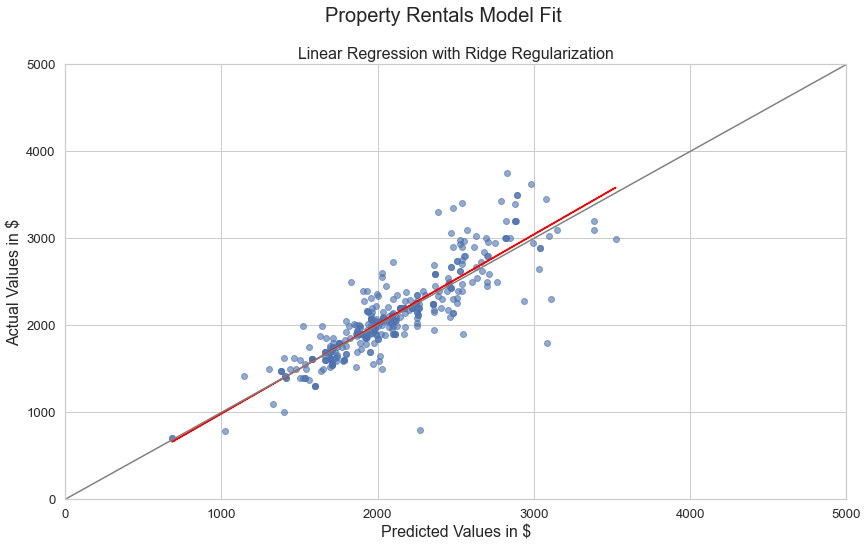

In [43]:
plt.figure(figsize=(14, 8))
plt.scatter(residuals, y_test, alpha=.6) 

z = np.polyfit(residuals, y_test, 1)
p = np.poly1d(z)
plb.plot(residuals, p(residuals), 'm-', color='red')
plt.plot(np.linspace(0,5000,1000), np.linspace(0,5000,1000), color='grey')

plt.xlim(0, 5000)
plt.ylim(0, 5000)

plt.suptitle('Property Rentals Model Fit', fontsize=20, fontname='Arial')
plt.title('Linear Regression with Ridge Regularization', fontsize=16, fontname='Arial')
plt.xlabel('Predicted Values in $', fontsize=16, fontname='Arial')
plt.ylabel('Actual Values in $', fontsize=16, fontname='Arial');

plt.savefig('Line_Fit.png')

### Residuals Plot

In [45]:
rid_residual = (y_test - rid_predict)

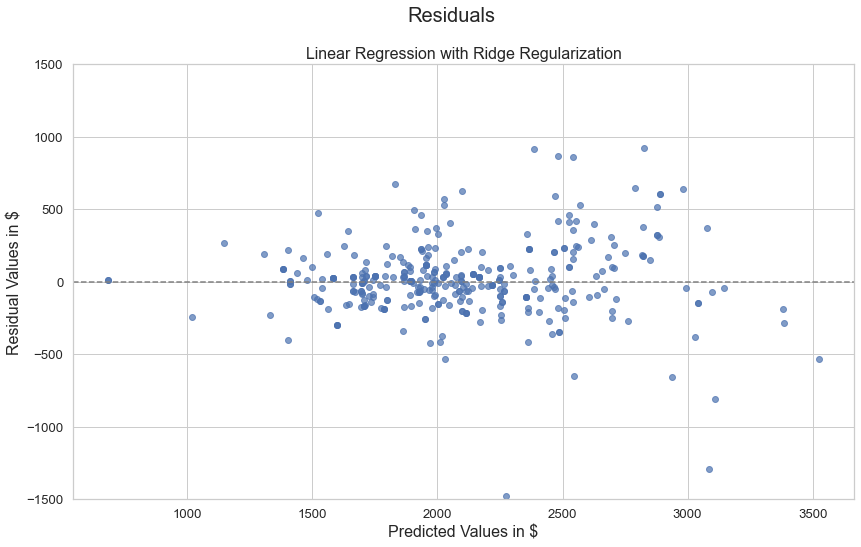

In [46]:
plt.figure(figsize=(14, 8))
plt.scatter(rid_predict, rid_residual, alpha=.7)   

plt.axhline(0, linestyle='--', color='grey')
plt.suptitle('Residuals', fontsize=20, fontname='Arial')
plt.title('Linear Regression with Ridge Regularization', fontsize=16, fontname='Arial')
plt.ylim(-1500, 1500)
plt.xlabel('Predicted Values in $', fontsize=16, fontname='Arial')
plt.ylabel('Residual Values in $', fontsize=16, fontname='Arial');

plt.savefig('Residuals_Ridge.png')

In [22]:
rid_residual

365      78.035437
344      71.521301
1606    -12.366395
70      131.080155
845      24.097901
Name: Price, dtype: float64

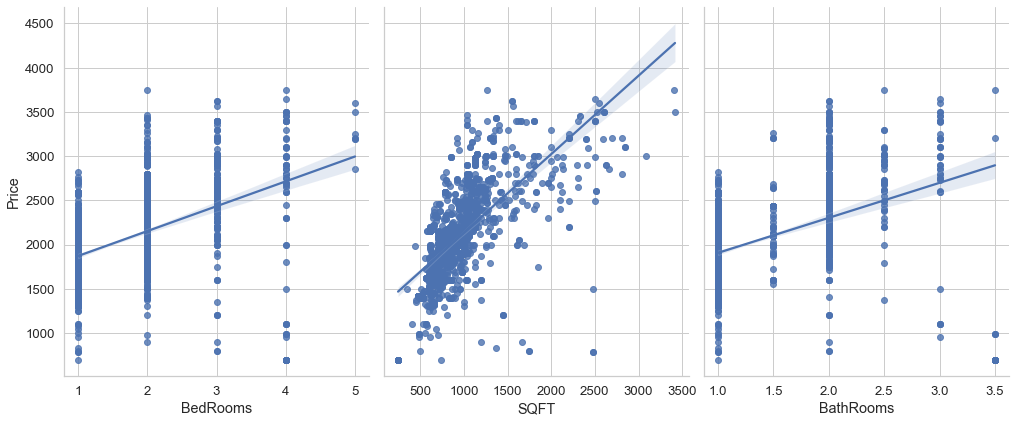

In [37]:
sns.pairplot(sf, x_vars=['BedRooms','SQFT','BathRooms'], y_vars='Price', height=6, aspect=0.8, kind='reg');
plt.savefig('price_main.png');